# Working with data in Python
## Intro

In [1]:
import pandas as pd

In [2]:
# Small test
df = pd.read_csv("data/AAPL.csv")
print(df[10:21])

          Date    Open    High     Low   Close    Volume  Adj Close
10  2012-08-28  674.98  676.10  670.67  674.80   9550600     674.80
11  2012-08-27  679.99  680.87  673.54  675.68  15250300     675.68
12  2012-08-24  659.51  669.48  655.55  663.22  15619300     663.22
13  2012-08-23  666.11  669.90  661.15  662.63  15004600     662.63
14  2012-08-22  654.42  669.00  648.11  668.87  20190100     668.87
15  2012-08-21  670.82  674.88  650.33  656.06  29025700     656.06
16  2012-08-20  650.01  665.15  649.90  665.15  21906600     665.15
17  2012-08-17  640.00  648.19  638.81  648.11  15812900     648.11
18  2012-08-16  631.21  636.76  630.50  636.34   9090500     636.34
19  2012-08-15  631.30  634.00  627.75  630.83   9190800     630.83
20  2012-08-14  631.87  638.61  630.21  631.69  12148900     631.69


In [7]:
# Compute max closing price
def get_max_close(symbol):
    # Read data from symbol
    df = pd.read_csv("data/{}.csv".format(symbol))
    return df['Close'].max()

for symbol in ["AAPL", "IBM"]:
    print("Max Close")
    print(symbol, get_max_close(symbol))
    print("\n")

Max Close
AAPL 680.44


Max Close
IBM 209.5




0       669.79
1       660.59
2       662.74
3       680.44
4       676.27
         ...  
3170     28.39
3171     26.88
3172     25.72
3173     24.60
3174     24.96
Name: Adj Close, Length: 3175, dtype: float64


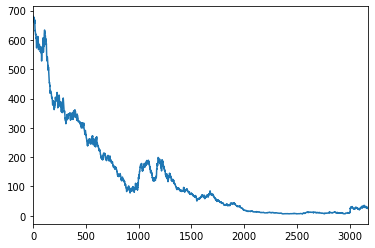

In [8]:
# Simple plotting
import matplotlib.pyplot as plt

df = pd.read_csv("data/AAPL.csv")
print(df["Adj Close"])
df["Adj Close"].plot()
plt.show()


The plot is plotted in reverse order, because the CSV is in reverse order

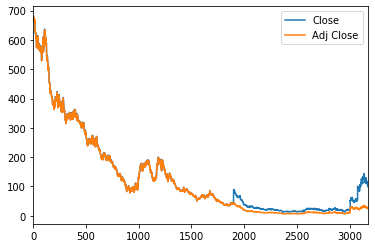

In [5]:
# Plotting  two columns
df = pd.read_csv("data/AAPL.csv")
df[["Close", "Adj Close"]].plot()
plt.show()

## Working with multiple stocks

We will solve a couple of problems:
* We will use date ranges
* Have multiple stocks
* Align dates
* Proper date order (not reverse)

In [13]:
# Define data range
start_date = "2010-01-22"
end_date = "2010-01-26"
dates = pd.date_range(start_date, end_date)
print(dates)

DatetimeIndex(['2010-01-22', '2010-01-23', '2010-01-24', '2010-01-25',
               '2010-01-26'],
              dtype='datetime64[ns]', freq='D')


Now we have an array of datetimeIndex objects for pandas for the range we want

In [24]:
# Create an empty dataframe 
df1 = pd.DataFrame(index=dates)
print(df1)

Empty DataFrame
Columns: []
Index: [2010-01-22 00:00:00, 2010-01-23 00:00:00, 2010-01-24 00:00:00, 2010-01-25 00:00:00, 2010-01-26 00:00:00]


And now we have an empty dataframe with the dates as indexes

---
We will read SPY into the dataframe we have with the the indexes we want

In [25]:
# Read SPY data into temporary dataframe
dfSPY = pd.read_csv("data/SPY.csv", 
                    index_col="Date", 
                    parse_dates=True, 
                    usecols=["Date", "Adj Close"], 
                    na_values=["nan"])

# Rename "Adj Close" column to "SPY"
dfSPY = dfSPY.rename(columns={'Adj Close': 'SPY'})

# Join dataframes (use left join by default)
df1 = df1.join(dfSPY, how="inner")


# Drop NaN values
df1 = df1.dropna()


print(df1)

               SPY
2010-01-22  104.34
2010-01-25  104.87
2010-01-26  104.43


In [26]:
# Read more stocks
symbols = ["GOOG", "IBM", "GLD"]
for symbol in symbols:
    df_temp = pd.read_csv("data/{}.csv".format(symbol), index_col="Date", 
                    parse_dates=True, 
                    usecols=["Date", "Adj Close"], 
                    na_values=["nan"])
    df_temp = df_temp.rename(columns={'Adj Close': symbol})
    df1 = df1.join(df_temp)
    
print(df1)

               SPY    GOOG     IBM     GLD
2010-01-22  104.34  550.01  119.61  107.17
2010-01-25  104.87  540.00  120.20  107.48
2010-01-26  104.43  542.42  119.85  107.56


Now we have all the data we want

In [32]:
# Turning into a function
def get_data(symbols, dates):
    df1 = pd.DataFrame(index=dates)
    dfSPY = pd.read_csv("data/SPY.csv", 
                        index_col="Date", 
                        parse_dates=True, 
                        usecols=["Date", "Adj Close"], 
                        na_values=["nan"])
    dfSPY = dfSPY.rename(columns={'Adj Close': 'SPY'})
    df1 = df1.join(dfSPY, how="inner")
    df1 = df1.dropna()
    for symbol in symbols:
        df_temp = pd.read_csv("data/{}.csv".format(symbol), index_col="Date", 
                        parse_dates=True, 
                        usecols=["Date", "Adj Close"], 
                        na_values=["nan"])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df1 = df1.join(df_temp)
    return df1

## Slicing the dataframe

In [33]:
# Get 2010 year
dates = pd.date_range('2010-01-01', '2010-12-31')
# Symbols
symbols = ["GOOG", "IBM", "GLD"]

In [37]:
# Get stock data
df = get_data(symbols, dates)
print(df)

               SPY    GOOG     IBM     GLD
2010-01-04  108.27  626.75  126.24  109.80
2010-01-05  108.56  623.99  124.71  109.70
2010-01-06  108.64  608.26  123.90  111.51
2010-01-07  109.10  594.10  123.47  110.82
2010-01-08  109.46  602.02  124.71  111.37
...            ...     ...     ...     ...
2010-12-27  121.90  602.38  141.17  135.02
2010-12-28  122.07  598.92  141.53  137.22
2010-12-29  122.16  601.00  142.32  137.71
2010-12-30  121.97  598.86  142.46  137.03
2010-12-31  122.00  593.97  142.55  138.72

[252 rows x 4 columns]


Now I have the data for a whole year

In [41]:
# Slice by row range (dates) using DataFrame.ix[] selector
# ix is deprecated we will use .loc here
print(df.loc['2010-01-01':'2010-01-31']) # January

               SPY    GOOG     IBM     GLD
2010-01-04  108.27  626.75  126.24  109.80
2010-01-05  108.56  623.99  124.71  109.70
2010-01-06  108.64  608.26  123.90  111.51
2010-01-07  109.10  594.10  123.47  110.82
2010-01-08  109.46  602.02  124.71  111.37
2010-01-11  109.61  601.11  123.41  112.85
2010-01-12  108.59  590.48  124.39  110.49
2010-01-13  109.51  587.09  124.12  111.54
2010-01-14  109.80  589.85  126.10  112.03
2010-01-15  108.57  580.00  125.60  110.86
2010-01-19  109.93  587.62  127.85  111.52
2010-01-20  108.81  580.41  124.14  108.94
2010-01-21  106.72  582.98  122.95  107.37
2010-01-22  104.34  550.01  119.61  107.17
2010-01-25  104.87  540.00  120.20  107.48
2010-01-26  104.43  542.42  119.85  107.56
2010-01-27  104.93  542.10  120.40  106.53
2010-01-28  103.73  534.29  117.94  106.48
2010-01-29  102.60  529.94  116.65  105.96


In [43]:
# Slice by column
print(df["GOOG"]) # a single label selects a single column
print(df[["IBM", "GLD"]]) # a list of labels selects multiple columns

2010-01-04    626.75
2010-01-05    623.99
2010-01-06    608.26
2010-01-07    594.10
2010-01-08    602.02
               ...  
2010-12-27    602.38
2010-12-28    598.92
2010-12-29    601.00
2010-12-30    598.86
2010-12-31    593.97
Name: GOOG, Length: 252, dtype: float64
               IBM     GLD
2010-01-04  126.24  109.80
2010-01-05  124.71  109.70
2010-01-06  123.90  111.51
2010-01-07  123.47  110.82
2010-01-08  124.71  111.37
...            ...     ...
2010-12-27  141.17  135.02
2010-12-28  141.53  137.22
2010-12-29  142.32  137.71
2010-12-30  142.46  137.03
2010-12-31  142.55  138.72

[252 rows x 2 columns]


In [44]:
# Slice through both dimensions (row, column)
print(df.loc['2010-03-10':'2010-03-15', ['SPY', 'IBM']])

               SPY     IBM
2010-03-10  109.84  120.26
2010-03-11  110.30  122.16
2010-03-12  110.31  122.48
2010-03-15  110.34  122.38


## Plotting a dataframe

In [61]:
import matplotlib.pyplot as plt

In [62]:
def normalize_data(df):
    # We will divide it by the first day
    return df / df.loc[0:]

In [63]:
def plot_data(df, title="Stock Prices"):
    ax = df.plot(title=title, fontsize=10)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show() # must be called to show 

In [64]:
plot_data(normalize_data(df))

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.datetimes.DatetimeIndex'> with these indexers [0] of <class 'int'>